## Загрузка библиотек

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [175]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    X = pd.read_csv(path_to_csv, parse_dates=['date'])
    y = None
    return X, y


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    
    # я преобразую тут к упорядоченным категориям, чтобы потом они на графиках отображались в нужном порядке
    col_types = {'experience': pd.CategoricalDtype(categories=['<1'] + [str(i) for i in range(1, 21)] + ['>20'], ordered=True),
                 'company_size': pd.CategoricalDtype(categories=['NA', '<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'], ordered=True),
                 'last_new_job': pd.CategoricalDtype(categories=['never', '1', '2', '3', '4', '>4'], ordered=True),
                 'education_level': pd.CategoricalDtype(categories=['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'], ordered=True),
                 'enrolled_university': pd.CategoricalDtype(categories=['no_enrollment', 'Part time course', 'Full time course'], ordered=True)}
    X = pd.read_csv(path_to_csv, index_col='enrollee_id', dtype=col_types)
    y = X['target']
    X.drop(columns='target', inplace=True)
    return X, y

In [2]:
COVID_DATA_PATH = 'hw1_data/covid.csv'
HR_DATA_PATH = 'hw1_data/hr.csv'

In [176]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.  (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3b6ea0220>,
      dtype=object)

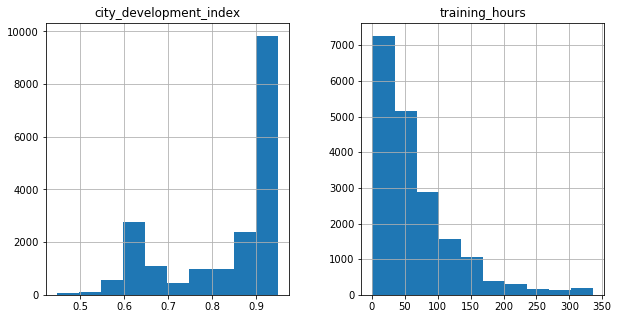

In [26]:
# Числовые признаки

X_hr.hist(column=['city_development_index', 'training_hours'], figsize=(10, 5))

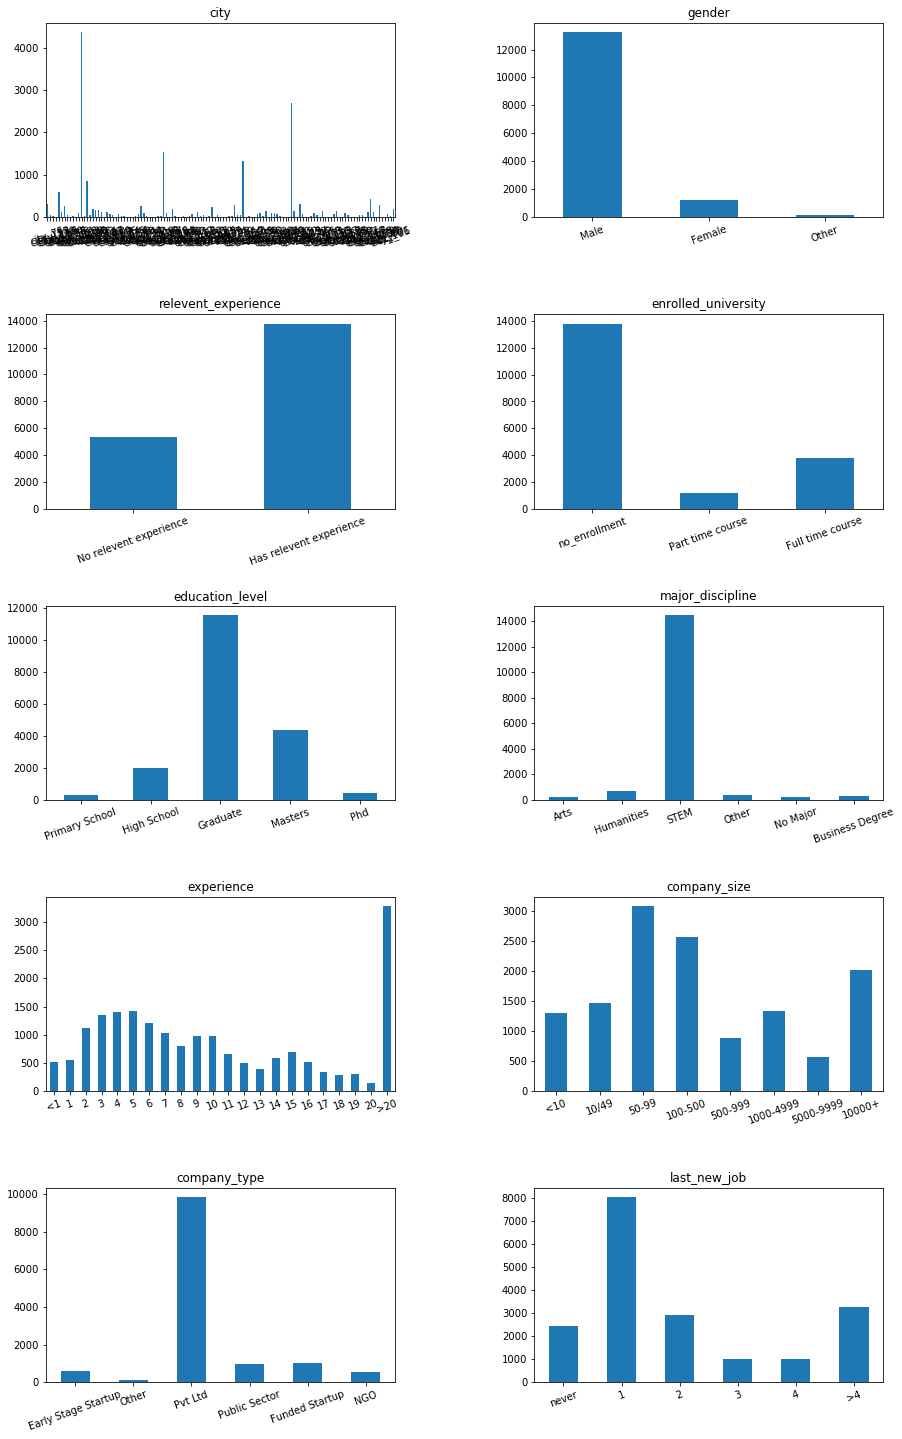

In [90]:
# Категориальные признаки

categorical = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job']

fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, col in enumerate(categorical):
    ax = fig.add_subplot(len(categorical)//2, 2, i+1)
    X_hr[col].value_counts(sort=False).plot(ax=ax, kind='bar', title=col, figsize=(15, 25), rot=20)

#### 2.  (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [96]:
print(f'Исходный размер датасета hr {X_hr.shape[0]}')

Исходный размер датасета hr 19158


In [97]:
X_hr_dropna = X_hr.dropna()

In [99]:
print(f'Pазмер датасета hr без NaN {X_hr_dropna.shape[0]}')

Pазмер датасета hr без NaN 8955


In [100]:
# Уменьшился больше чем в 2 раза

_Ваш ответ_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3b44da2b0>,
      dtype=object)

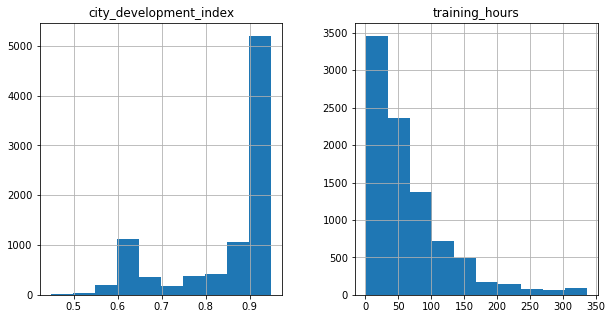

In [101]:
# Числовые признаки

X_hr_dropna.hist(column=['city_development_index', 'training_hours'], figsize=(10, 5))

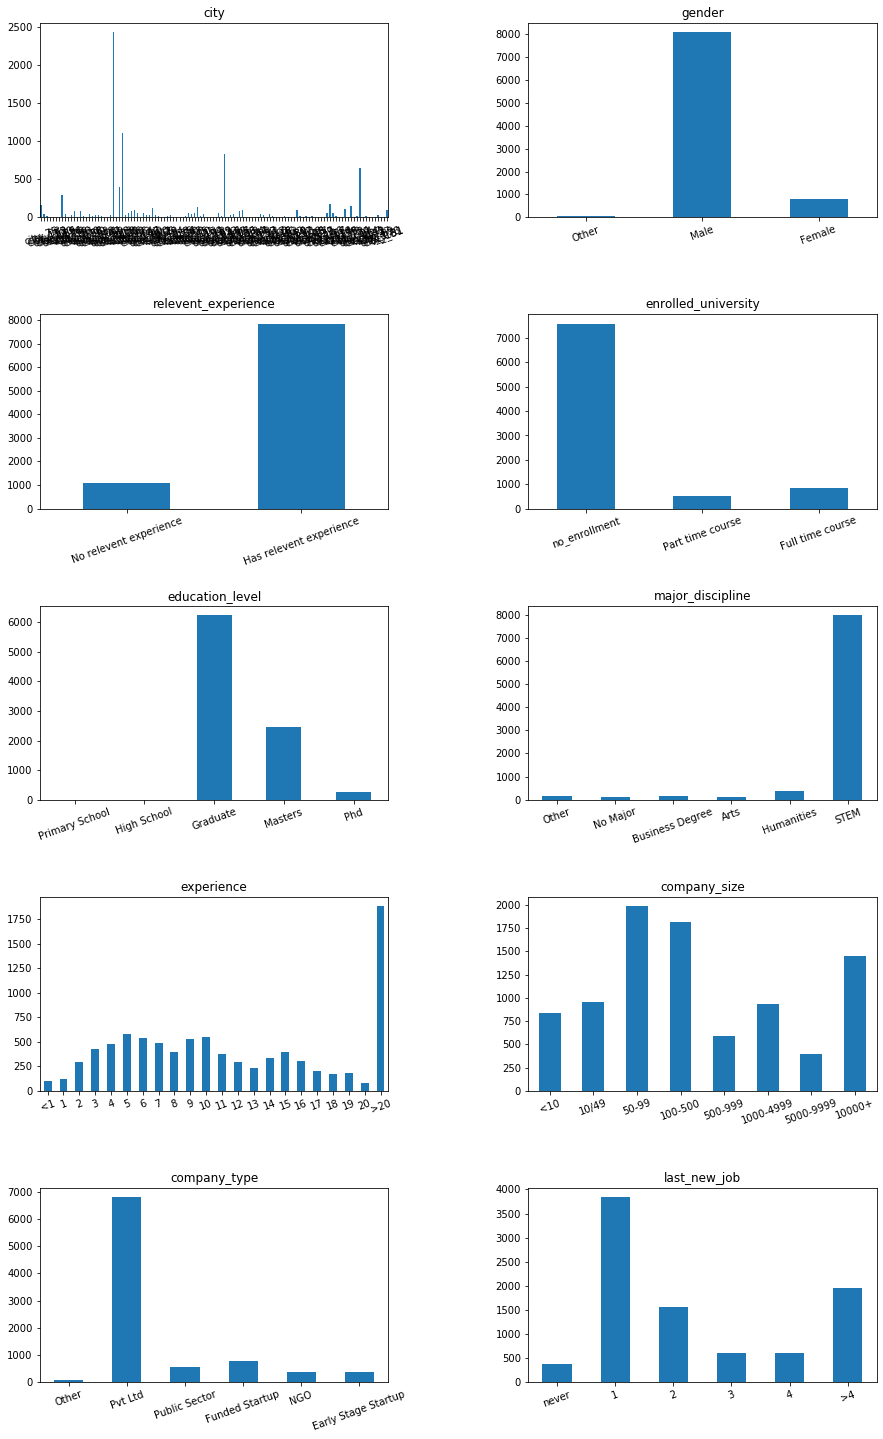

In [102]:
# Категориальные признаки

categorical = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job']

fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, col in enumerate(categorical):
    ax = fig.add_subplot(len(categorical)//2, 2, i+1)
    X_hr_dropna[col].value_counts(sort=False).plot(ax=ax, kind='bar', title=col, figsize=(15, 25), rot=20)

In [103]:
# Некоторые категории вообще исчезли из датасета

Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

In [127]:
# Количество пропусков
for col in X_hr.columns:
    print(col, X_hr[col].isna().sum())
print('y_hr', y_hr.isna().sum())

city 0
city_development_index 0
gender 4508
relevent_experience 0
enrolled_university 386
education_level 460
major_discipline 2813
experience 65
company_size 5938
company_type 6140
last_new_job 423
training_hours 0
y_hr 0


In [113]:
# У меня вообще нет в этом датасете пропущенных числовых значений
# Но если бы они были, то я бы заменил 'training_hours' медианой, потому что там слишком несимметричное распределение
# А 'city_development_index' постарался бы дропнуть, потому что оно бимодальное и непонятно чем заменять - 
# среднее и медианы попадают в провал на гистограмме, а мод две

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

_Ваш ответ_

In [128]:
# Новая категория NA добавлена в company_size, gender, major_discipline, company_type, 
# потому что в них слишком большое количество пропусков и 
# присоединение их к существующей категории слишком изменит картинку
# Для остальных колонок выбрана одна из категорий типа Other, потому что в них мало пропусков и есть 
# какой-то другой выраженный пик, так что присоединение пропусков мало что изменит

def fill_na(X, y):
    # Возвращает данные без NaN значений
    X_fill = X.fillna(value={'gender': 'NA', 'enrolled_university': 'no_enrollment', 
                             'education_level': 'Primary School', 'major_discipline': 'NA', 'experience': '<1',
                            'company_size': 'NA', 'company_type': 'NA', 'last_new_job': 'never'})
    y_fill = y.fillna(0)
    return X_fill, y_fill

In [129]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

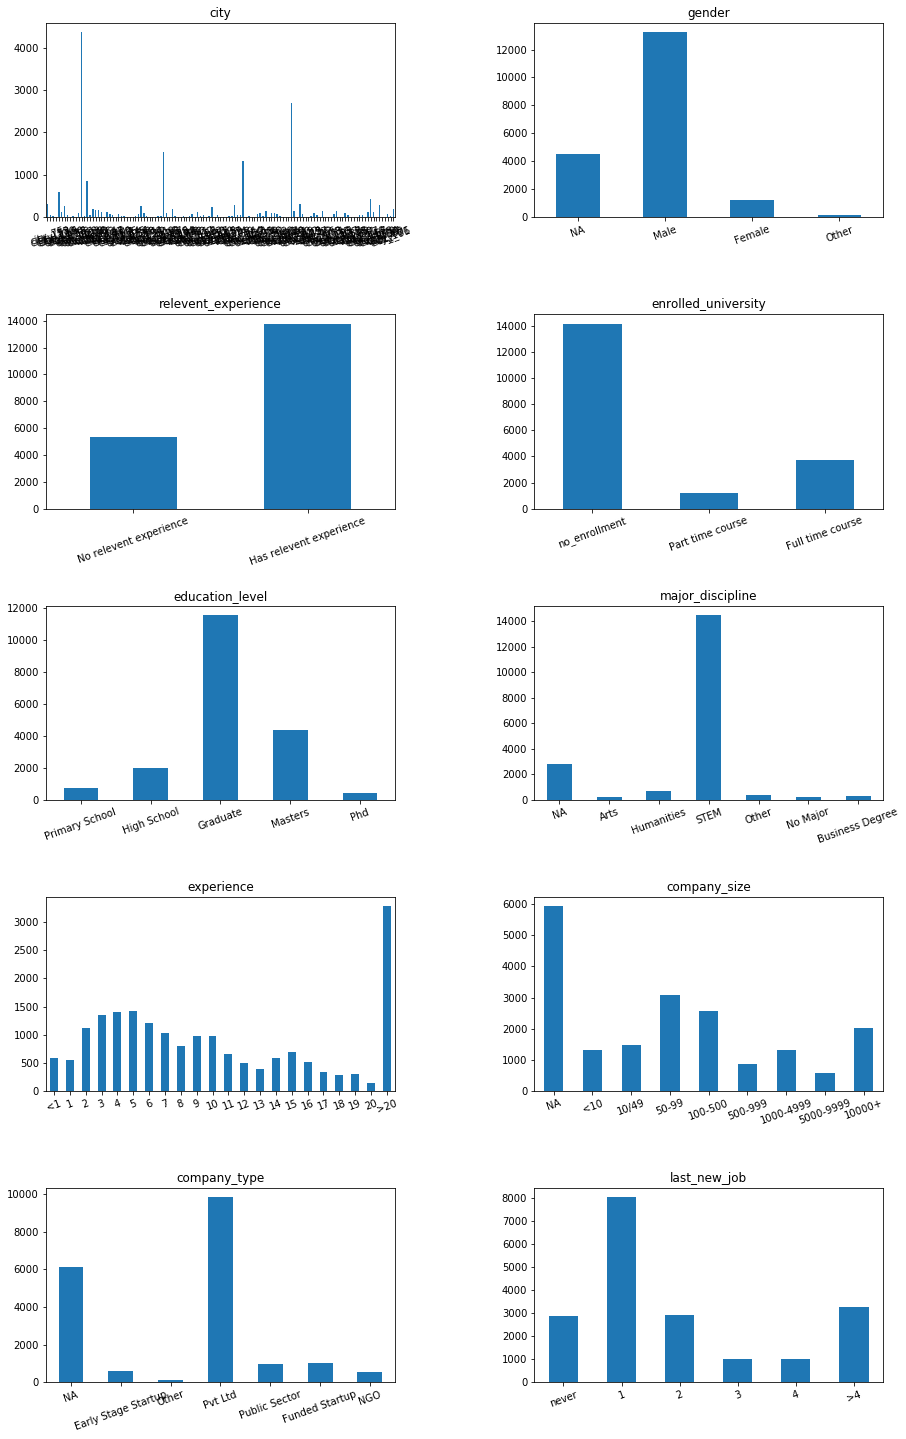

In [130]:
# Категориальные признаки

categorical = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job']

fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, col in enumerate(categorical):
    ax = fig.add_subplot(len(categorical)//2, 2, i+1)
    X_hr_fill[col].value_counts(sort=False).plot(ax=ax, kind='bar', title=col, figsize=(15, 25), rot=20)

_Ваш ответ_

In [131]:
# Примерно того же вида, но и изначально. Если не считать новые колонки NA в некоторых

### Задание 3 (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [137]:
counts = X_covid.groupby(['country'])['date'].count()
counts[counts == 46]

country
Bahrain    46
Name: date, dtype: int64

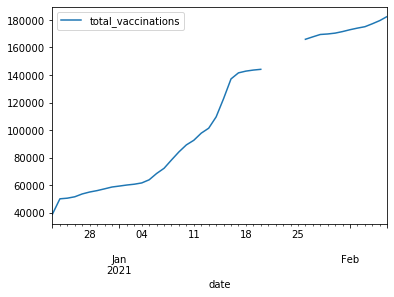

In [141]:
X_covid[X_covid['country'] == 'Bahrain'].plot(x = 'date', y = 'total_vaccinations')

In [146]:
X_covid[(X_covid['country'] == 'Bahrain') & (X_covid['total_vaccinations'].isna())]['date']

107   2021-01-21
108   2021-01-22
109   2021-01-23
110   2021-01-24
111   2021-01-25
Name: date, dtype: datetime64[ns]

In [162]:
last_value = float(X_covid[(X_covid['country'] == 'Bahrain') & (X_covid['date'] == '2021-01-20')]['total_vaccinations'])
X_bahrain_filled = X_covid[X_covid['country'] == 'Bahrain'].fillna(value = {'total_vaccinations': last_value})

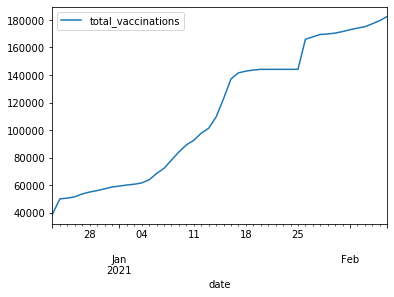

In [164]:
X_bahrain_filled.plot(x = 'date', y = 'total_vaccinations')

_Ваш ответ_

In [165]:
# Я думал сначала сделать линейную интерполяцию между точками разрыва, но потом подумал, 
# что "линейная" вакцинация это как будто у нас есть данные и она действительно была линейной,
# а у нас нет данных за эти 5 дней, поэтому возможно такая ступенька лучше отражает этот факт

### Задание 4  (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


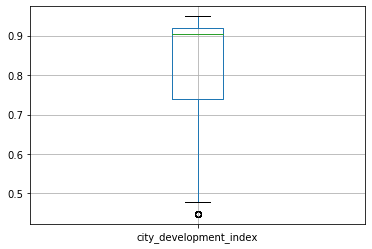

In [169]:
X_hr.boxplot(column=['city_development_index'])

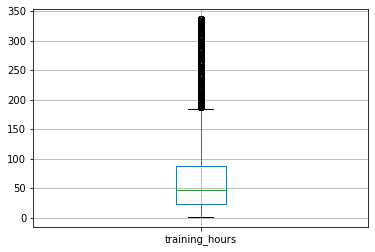

In [170]:
X_hr.boxplot(column=['training_hours'])

In [172]:
y_hr.unique()

array([1., 0.])

_Ваш ответ_

In [173]:
# Наверное, нельзя считать эти кружки выбросами. Индекс находится в пределах от 0 до 1, как и положено, 
# а количество учебных часов, теоретически, может быть бесконечным
# А для категориальных переменных, наверное, нельзя говорить о выбросах.

### Задание 5  (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [221]:
def encode(X):
    # Возвращает данные без категориальных признаков

    onehot_enc = ['gender', 'relevent_experience', 'major_discipline', 'company_type']
    X_encode = pd.get_dummies(X, prefix=onehot_enc, columns=onehot_enc)
    
    label_enc = ['enrolled_university', 'education_level', 'experience', 'company_size', 'last_new_job']
    for col in label_enc:
        X_encode.loc[:, col+'_label'] = pd.factorize(X[col], sort=True)[0].reshape(-1, 1)
        
    frequency_enc = ['city']
    for col in frequency_enc:
        fe = X[col].value_counts()/len(X)
        X_encode.loc[:, col+'_frequency'] = X[col].map(fe)
           
    X_encode.drop(columns=label_enc, inplace=True)
    X_encode.drop(columns=frequency_enc, inplace=True)
    
    return X_encode

In [224]:
X_hr_encode = encode(X_hr_fill)

In [225]:
X_hr_encode.dtypes

city_development_index                         float64
training_hours                                   int64
gender_Female                                    uint8
gender_Male                                      uint8
gender_NA                                        uint8
gender_Other                                     uint8
relevent_experience_Has relevent experience      uint8
relevent_experience_No relevent experience       uint8
major_discipline_Arts                            uint8
major_discipline_Business Degree                 uint8
major_discipline_Humanities                      uint8
major_discipline_NA                              uint8
major_discipline_No Major                        uint8
major_discipline_Other                           uint8
major_discipline_STEM                            uint8
company_type_Early Stage Startup                 uint8
company_type_Funded Startup                      uint8
company_type_NA                                  uint8
company_ty

_Ваш ответ_

In [178]:
# Я использую label encoding для упорядоченных категориальных переменных: enrolled_university, education_level,
# experience, company_size, last_new_job
# One-hot для кат. данных без упорядоченности: gender, relevent_experience, major_discipline, company_type
# City по идее относится туда же, но там так много городов, что с one-hot это сделает датасет безразмерным,
# поэтому я выбрал frequency encoding, потому что по графикам разные города имеют явно разную частоту и возможно
# эта частота как-то влияет на таргетную переменную (например, в больших городах с большим числом учащихся выше 
# количество сменивших работу, или наоборот ниже)

### Задание 6 (3.5 балла)

Выполните задание для датасета _hr_.




#### 1. (1 балл)
Реализуйте функцию undersampling

#### 2. (1 балл)
Реализуйте функцию oversampling

In [ ]:
def undersampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    return X_under, y_under

def oversampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    return X_over, y_over

In [ ]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

#### 3. (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = # YOUR_CODE
X_hr_SMOTE, y_hr_SMOTE = # YOUR_CODE

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

In [92]:
# YOUR CODE

_Ваш ответ_